In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Load the dataset
dataset = pd.read_csv('/Users/aumchampaneri/Downloads/tableConvert.com_octorp.csv', header=0)

# Preprocess the data
dataset['Brain Weight (grams)'] = dataset['Brain Weight (grams)'].replace({'0.428?': '0.428', '0.453?': '0.453'})
dataset['Mouse'] = dataset['Mouse'].replace({'wt01': '0001', 'wt02': '0002', 'wt03': '0003', 'wt04': '0004'}).astype(float)
dataset.set_index('Mouse', inplace=True)

# Convert specified columns to float if they exist
columns_to_convert = [
    'Age (Days)', 'Body Weight (grams)', 'Kidney Weight L (grams)',
    'Kidney Weight R (grams)', 'Brain Weight (grams)', 'Glomeruli Count L',
    'Glomeruli Count R', 'Nephrons / Kidney-L (mg)', 'Nephrons / Kidney-R (mg)'
]
existing_columns_to_convert = [col for col in columns_to_convert if col in dataset.columns]
dataset[existing_columns_to_convert] = dataset[existing_columns_to_convert].astype(float)

# Convert 'Genotype' and 'Gender' columns to string if they exist
if 'Genotype' in dataset.columns:
    dataset['Genotype'] = dataset['Genotype'].astype(str)
if 'Gender' in dataset.columns:
    dataset['Gender'] = dataset['Gender'].astype(str)

# Convert 'Date of Birth' and 'Date of Sacrifice' columns to datetime if they exist
if 'Date of Birth' in dataset.columns:
    dataset['Date of Birth'] = pd.to_datetime(dataset['Date of Birth'])
if 'Date of Sacrifice' in dataset.columns:
    dataset['Date of Sacrifice'] = pd.to_datetime(dataset['Date of Sacrifice'])

# Optional: Verify the changes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 2317.0 to 2599.0
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Genotype                  38 non-null     object        
 1   Gender                    38 non-null     object        
 2   Date of Birth             38 non-null     datetime64[ns]
 3   Date of Sacrifice         38 non-null     datetime64[ns]
 4   Age (Days)                38 non-null     float64       
 5   Body Weight (grams)       38 non-null     float64       
 6   Kidney Weight L (grams)   38 non-null     float64       
 7   Kidney Weight R (grams)   38 non-null     float64       
 8   Brain Weight (grams)      38 non-null     float64       
 9   Glomeruli Count L         38 non-null     float64       
 10  Glomeruli Count R         38 non-null     float64       
 11  Nephrons / Kidney-L (mg)  38 non-null     float64       
 12  Nephrons / Kidney-R 

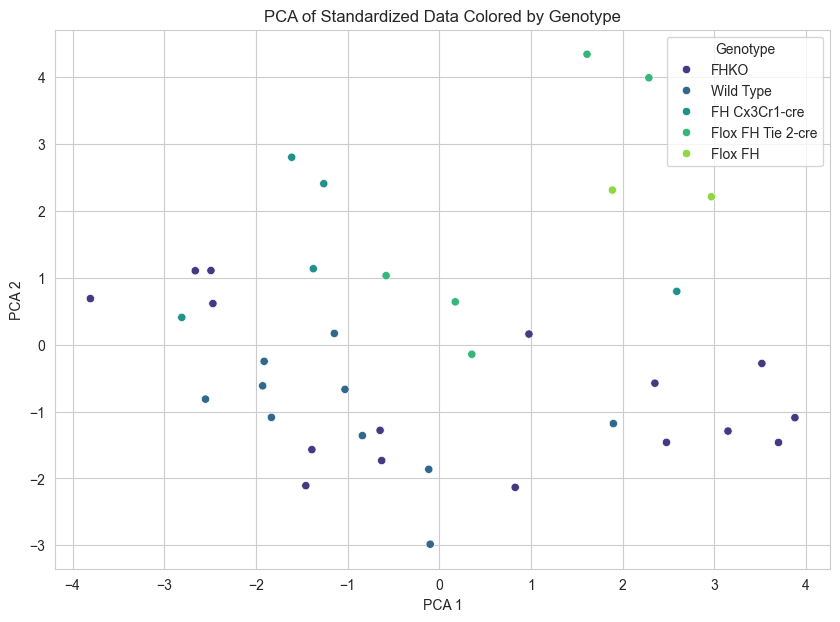

In [80]:
# Normalize the data except the index
scaler = StandardScaler()
numeric_columns = dataset.select_dtypes(include=[float]).columns
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dataset[numeric_columns])

# Create a DataFrame with PCA results and Genotype
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Genotype'] = dataset['Genotype'].values

# Visualize PCA with Genotype coloring
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Genotype', data=pca_df, palette='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Standardized Data Colored by Genotype')
plt.legend(title='Genotype')
plt.show()

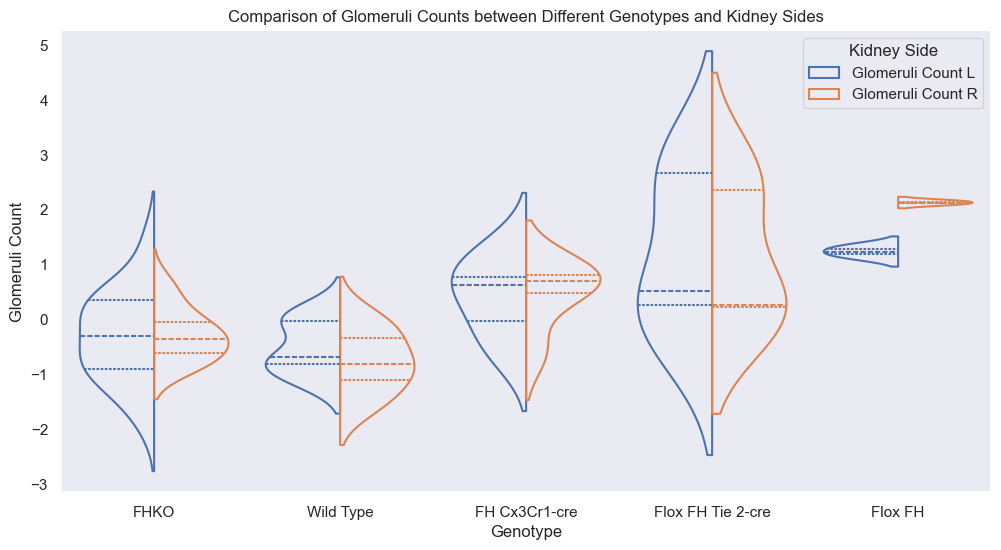

In [86]:
# Melt the dataset to have a single column for Glomeruli counts
melted_dataset = dataset.melt(id_vars=['Genotype'], value_vars=['Glomeruli Count L', 'Glomeruli Count R'],
                              var_name='Kidney Side', value_name='Glomeruli Count')

# Create a violin plot to compare Glomeruli counts between different Genotypes and Kidney sides
sns.set_theme(style="dark")
plt.figure(figsize=(12, 6))
sns.violinplot(x='Genotype', y='Glomeruli Count', hue='Kidney Side', data=melted_dataset, split=True, inner="quartile", density_norm='width', fill=False)
plt.xlabel('Genotype')
plt.ylabel('Glomeruli Count')
plt.title('Comparison of Glomeruli Counts between Different Genotypes and Kidney Sides')
plt.show()


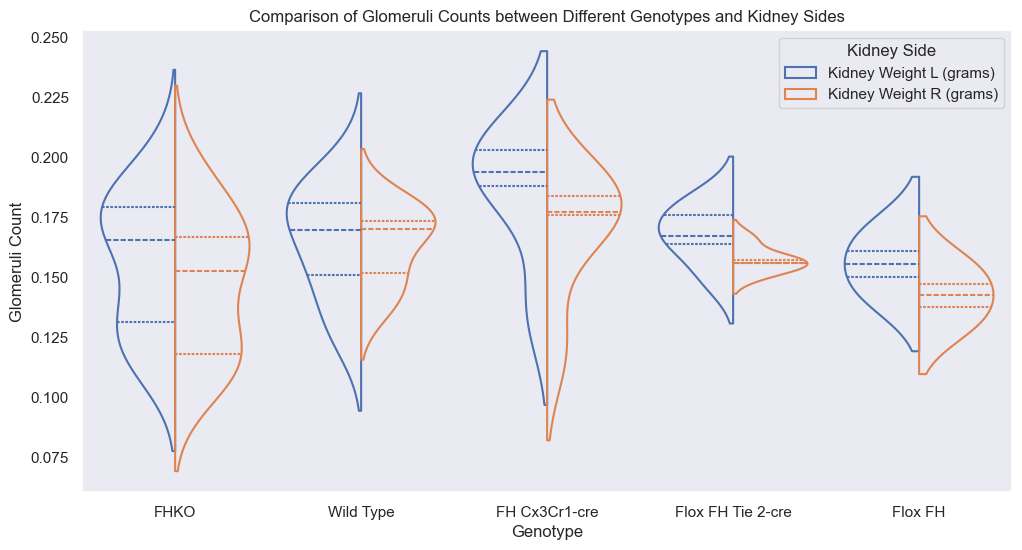

In [88]:
# Melt the dataset to have a single column for Kidney Weights
melted_dataset = dataset.melt(id_vars=['Genotype'], value_vars=['Kidney Weight L (grams)', 'Kidney Weight R (grams)'],
                              var_name='Kidney Side', value_name='Kidney Weight')

# Create a violin plot to compare Kidney Weights between different Genotypes and Kidney sides
sns.set_theme(style="dark")
plt.figure(figsize=(12, 6))
sns.violinplot(x='Genotype', y='Kidney Weight', hue='Kidney Side', data=melted_dataset, split=True, inner="quartile", density_norm='width', fill=False)
plt.xlabel('Genotype')
plt.ylabel('Kidney Weight')
plt.title('Comparison of Kidney Weights between Different Genotypes and Kidney Sides')
plt.show()

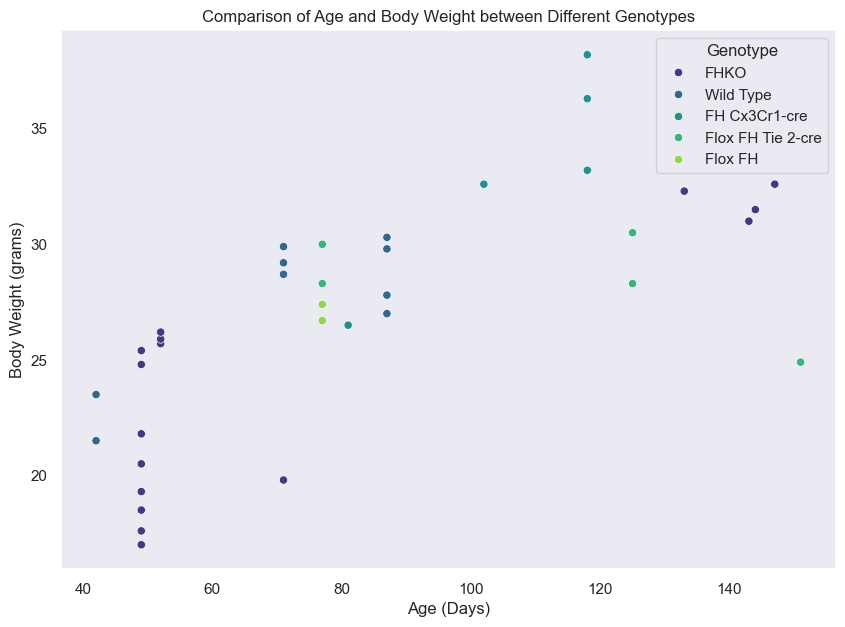

In [96]:
# Create a scatter plot to compare Age and Body Weight between different Genotypes
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age (Days)', y='Body Weight (grams)', hue='Genotype', data=dataset, palette='viridis')
plt.xlabel('Age (Days)')
plt.ylabel('Body Weight (grams)')
plt.title('Comparison of Age and Body Weight between Different Genotypes')
plt.legend(title='Genotype')
plt.show()

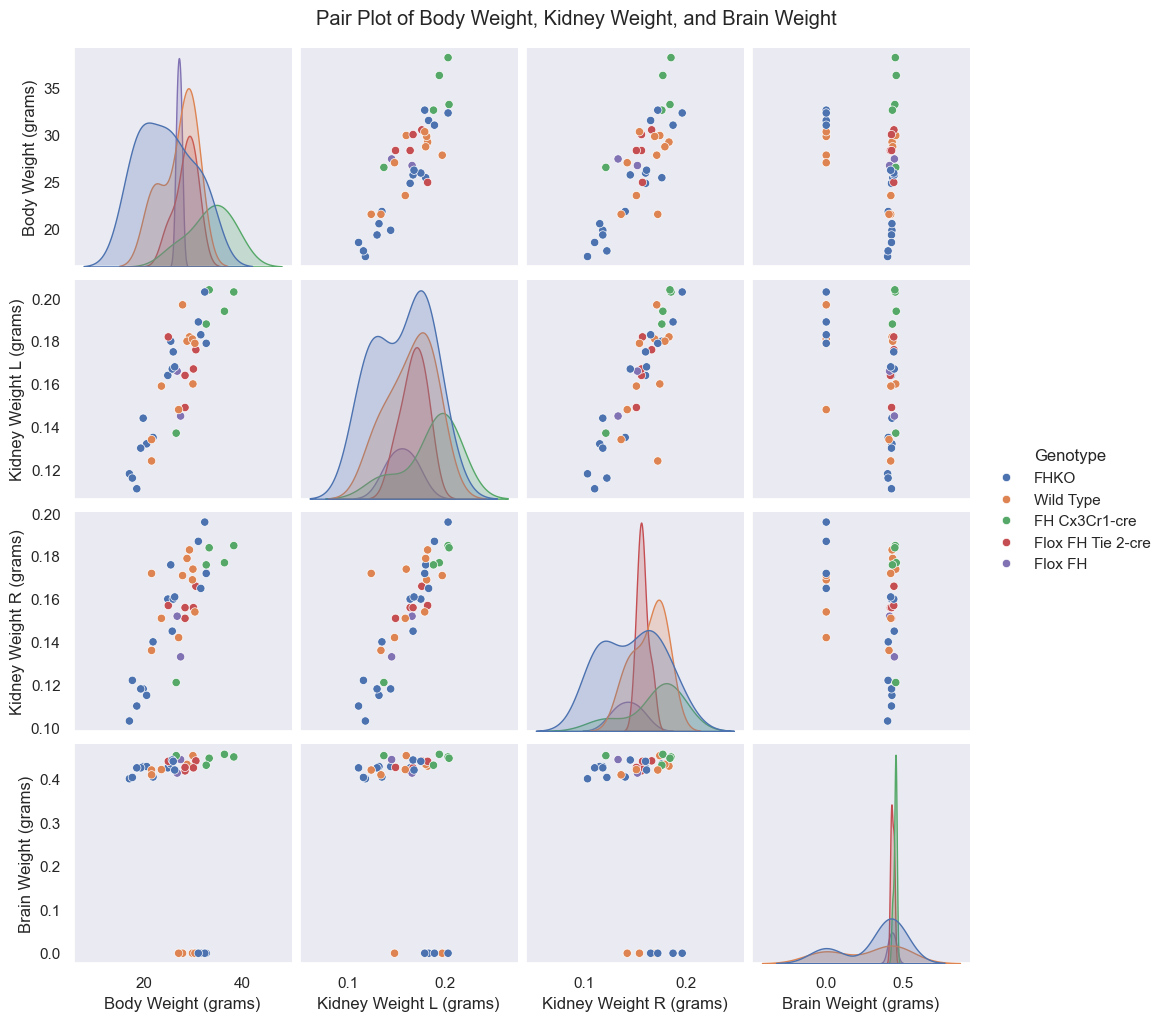

In [97]:

# Select the columns of interest
columns_of_interest = ['Body Weight (grams)', 'Kidney Weight L (grams)', 'Kidney Weight R (grams)', 'Brain Weight (grams)']

# Create a pair plot
sns.pairplot(dataset, vars=columns_of_interest, hue='Genotype')
plt.suptitle('Pair Plot of Body Weight, Kidney Weight, and Brain Weight', y=1.02)
plt.show()

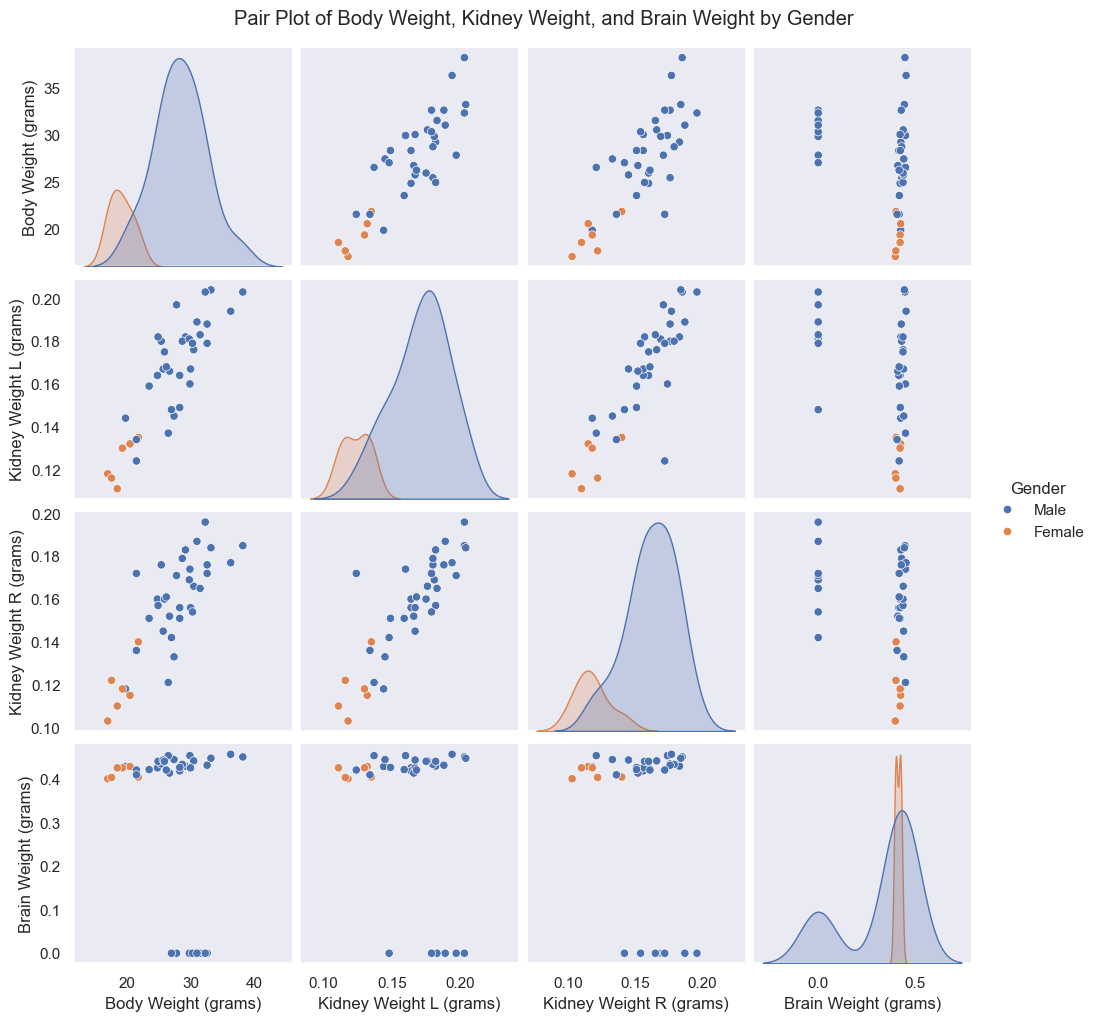

In [98]:
# Select the columns of interest
columns_of_interest = ['Body Weight (grams)', 'Kidney Weight L (grams)', 'Kidney Weight R (grams)', 'Brain Weight (grams)']

# Pair plot for Body Weight, Kidney Weight, and Brain Weight by Gender
sns.pairplot(dataset, vars=columns_of_interest, hue='Gender')
plt.suptitle('Pair Plot of Body Weight, Kidney Weight, and Brain Weight by Gender', y=1.02)
plt.show()